# Hot Plasma Paper I--Figures

Here, we'll create all figures needed for "Hot" Plasma Paper I

+ Figure 1: $T$ and $n$ for single-fluid case for multiple heating durations, two panels.
+ Figure 2: $T_e,T_i$ and $n$ for two-fluid case for $\tau=200,40$ s, two panels.
+ Figure 3: $\mathrm{EM}(T)$ distributions for $\tau=20,40,200,500$ s, keeping $q=10$ erg cm$^{-3}$ s$^{-1}$ constant
+ Figure 4: $\mathrm{EM}(T)$ distributions for $H^{'}_0=H_0/2,H_0,2H_0,5H_0$ for $H_0$ such that $q=10$ erg cm$^{-3}$ s$^{-1}$ for $\tau=200$ s, one panel
    + Maybe have multiple panels for multiple heating cases?
    + Panel 2?: $n_0=2\times10^8,2\times10^9$ cm$^{-3}$, with $H_0$ and $\tau=200$ s
    + Panel 3?: $L=20,40,75$ Mm, with $H_0$ and $\tau=200$ s
    + Panel 4?: $\mathrm{EM}(T)$ for Spitzer conduction, flux limiting with $f=1/6$ and $f=1/30$, (for both $T$ and $T_{eff}$?)
+ Figure 5: $\mathrm{EM}(T)$ for electron, ion heating for long,short pulses
+ Figure 6: $T,T_{eff}$ for long and short heating durations for electron and ion heating; show $T, T_e, T_{eff}$ for each.
+ Figure 7: $\mathrm{EM}$(T) including $T_{eff}$; not sure about how to incorporate varying parameters.

Not sure if heat flux comparisons are necessary for electron and ion heating as well.

In [1]:
#Import needed modules
import os
import sys
from imp import reload
import numpy as np
import seaborn.apionly as sns
from matplotlib import ticker
import matplotlib.pyplot as plt
plt.style.use('papers')
%matplotlib inline
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
sys.path.append('/home/wtb2/Documents/boilerplate/')
import ebtel_wrapper as ew
import ebtel_run as ebr
import plot_helpers as ph
import em_binner as emb
reload(ebr)
reload(ew)

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_wrapper' from '/home/wtb2/Documents/EBTEL_C/bin/ebtel_wrapper.py'>

Set up a base dictionary. We'll modify it appropriately.

In [2]:
#input dictionary
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'classical',
              'solver':'euler','ic_mode':'st_eq','print_plasma_params':'True'}
config_dict['total_time'] = 5000
config_dict['tau'] = 0.5
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 1.0/6.0
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 0.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000
config_dict['amp_switch'] = 'uniform'
config_dict['amp0'] = 0.001
config_dict['amp1'] = 0.01
config_dict['alpha'] = 1.5
config_dict['loop_length'] = 40.0
config_dict['num_events'] = 1
config_dict['t_pulse_half'] = 100
config_dict['h_nano'] = 0.1
config_dict['sample_rate'] = 1
base_output = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/hp1_figs_sandbox'

Write a function to run EBTEL model and easily vary and save the relevant parameters.

In [3]:
def t0_scaling(L,n):
    return (1.83e+3)**(3./2.)*np.sqrt(2.*1.38e-16*L*n)

In [4]:
def run_and_print(input_dict,tau,h0,L,f,flux_opt,run_inst,T0=False,n0=False):
    #set params
    input_dict['t_pulse_half'] = tau/2.0
    input_dict['h_nano'] = h0
    input_dict['loop_length'] = L
    input_dict['sat_limit'] = f
    input_dict['heat_flux_option'] = flux_opt
    input_dict['heat_species'] = 'electron'
    if T0 and n0:
        input_dict['ic_mode'] = 'force'
        input_dict['T0'] = T0
        input_dict['n0'] = n0
    else:
        input_dict['ic_mode'] = 'st_eq'
    #print config file
    input_dict['output_file'] = base_output + '_single'
    ew.print_xml_config(input_dict,config_file=input_dict['output_file']+'.xml')
    #single-fluid    
    #run model
    ew.run_ebtel('/home/wtb2/Documents/EBTEL_C/bin/','',config_file=input_dict['output_file']+'.xml')
    #save parameters to list
    temp = np.loadtxt(input_dict['output_file']+'.txt')
    t,T,n = temp[:,0],temp[:,1],temp[:,2]
    np.savetxt(os.path.join(os.path.dirname(config_dict['output_file']+'.txt'),'.ips.txt'),
           np.transpose([t,T,n]),header=str(len(temp[:,0])),comments='',fmt='%f\t%e\t%e')
    #two-fluid
    #--electron heating
    input_dict['output_file'] = base_output + '_electron'
    ew.print_xml_config(input_dict,config_file=input_dict['output_file']+'.xml')
    #run model
    run_inst.run_ebtel_single(input_dict['output_file']+'.xml',verbose=False)
    #save parameters to list
    temp = np.loadtxt(input_dict['output_file']+'.txt')
    te,Tee,Tei,ne = temp[:,0],temp[:,1],temp[:,2],temp[:,3]
    np.savetxt(os.path.join(os.path.dirname(config_dict['output_file']+'.txt'),'.ips.txt'),
           np.transpose([te,Tee,ne]),header=str(len(temp[:,0])),comments='',fmt='%f\t%e\t%e')
    #--ion heating
    #print config file
    input_dict['heat_species'] = 'ion'
    input_dict['output_file'] = base_output + '_ion'
    ew.print_xml_config(input_dict,config_file=input_dict['output_file']+'.xml')
    #run model
    run_inst.run_ebtel_single(input_dict['output_file']+'.xml',verbose=False)
    #save parameters to list
    temp = np.loadtxt(input_dict['output_file']+'.txt')
    ti,Tie,Tii,ni = temp[:,0],temp[:,1],temp[:,2],temp[:,3]
    np.savetxt(os.path.join(os.path.dirname(config_dict['output_file']+'.txt'),'.ips.txt'),
           np.transpose([ti,Tie,ni]),header=str(len(temp[:,0])),comments='',fmt='%f\t%e\t%e')
    return {'t':t,'te':te,'ti':ti,'T':T,'Tee':Tee,'Tei':Tei,'Tie':Tie,'Tii':Tii,'n':n,'ne':ne,'ni':ni}

Instantiate runner class to run the EBTEL model.

In [5]:
runner = ebr.Runner('/home/wtb2/Documents/EBTEL-2fluid_repo/bin/','')

## Figure 1

Figure comparing $T$ and $n$ profiles for single-fluid case for varying values of $\tau$. Here, we will look at several different values for the pulse duration $\tau_H=20,40,200,500$ s.

In [6]:
tau_h = [20,40,200,500]
tau_h_results = []
for t in tau_h:
    results = run_and_print(config_dict,t,20.0/t,40.0,1,'classical',runner)
    tau_h_results.append(results)

Build figure.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


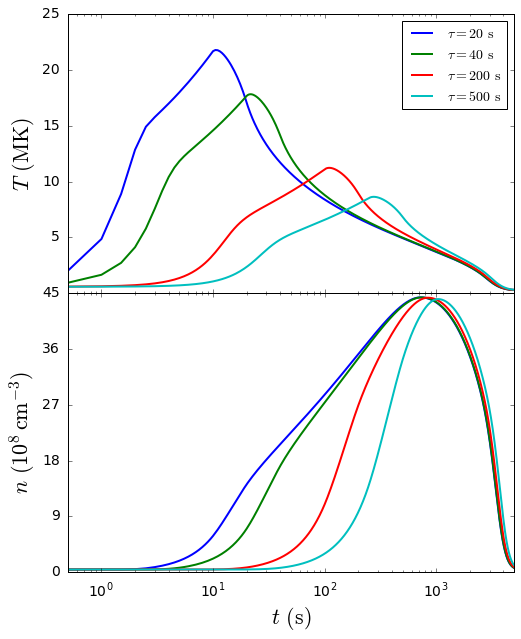

In [7]:
fig,ax = plt.subplots(2,1,figsize=(8,10),sharex=True)
plt.subplots_adjust(hspace=0.0)
#plotting
for i in range(len(tau_h_results)):
    ax[0].plot(tau_h_results[i]['t'],tau_h_results[i]['T']/1e+6,color=sns.color_palette()[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau_h[i])
    ax[1].plot(tau_h_results[i]['t'],tau_h_results[i]['n']/1e+8,color=sns.color_palette()[i],
               linestyle='solid')
#scale
ax[0].set_xscale('log')
ax[1].set_xscale('log')
#limits
ax[0].set_xlim([0,5000])
ax[0].set_ylim([0,25])
ax[1].set_xlim([0,5000])
ax[1].set_ylim([0,45])
#tick labels
tmp_tcks = ax[0].get_yticks()
ax[0].set_yticks(ph.tick_maker(tmp_tcks,6)[1:])
tmp_tcks = ax[1].get_yticks()
ax[1].set_yticks(ph.tick_maker(tmp_tcks,6))
#axes labels
ax[1].set_xlabel(r'$t$ $\mathrm{(s)}$')
ax[0].set_ylabel(r'$T$ $\mathrm{(MK)}$')
ax[1].set_ylabel(r'$n$ $(10^8\,\mathrm{cm}^{-3})$')
#legend
ax[0].legend()
#plt.savefig('/home/wtb2/Documents/papers/hot_non-flaring_plasma_1/figures/tt_eff_compare.pdf')
plt.show()

## Figure 2

Four-panel figure for $\tau=200,40$ s for electron heating and ion heating, showing $T_e,T_i,n$ for each case.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


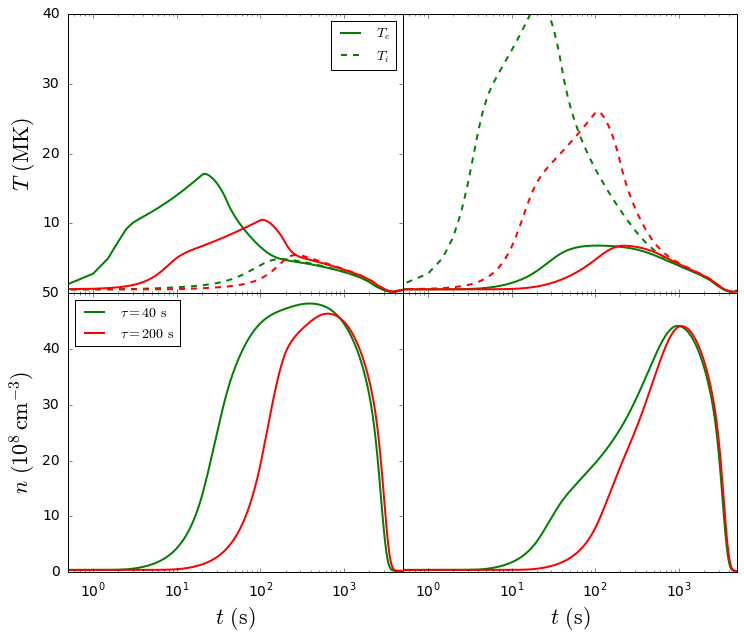

In [8]:
#set-up figure
fig,ax = plt.subplots(2,2,figsize=(12,10),sharex=True,)
plt.subplots_adjust(hspace=0.0,wspace=0.0)
#place data
#northwest
ax[0,0].plot(tau_h_results[1]['te'],tau_h_results[1]['Tee']/1e+6,color=sns.color_palette()[1],
             linestyle='solid',label=r'$T_e$')
ax[0,0].plot(tau_h_results[1]['te'],tau_h_results[1]['Tei']/1e+6,color=sns.color_palette()[1],
             linestyle='dashed',label=r'$T_i$')
ax[0,0].plot(tau_h_results[2]['te'],tau_h_results[2]['Tee']/1e+6,color=sns.color_palette()[2],
             linestyle='solid')
ax[0,0].plot(tau_h_results[2]['te'],tau_h_results[2]['Tei']/1e+6,color=sns.color_palette()[2],
             linestyle='dashed')
#northeast
ax[0,1].plot(tau_h_results[1]['ti'],tau_h_results[1]['Tie']/1e+6,color=sns.color_palette()[1],
             linestyle='solid',label=r'$T_e$')
ax[0,1].plot(tau_h_results[1]['ti'],tau_h_results[1]['Tii']/1e+6,color=sns.color_palette()[1],
             linestyle='dashed',label=r'$T_i$')
ax[0,1].plot(tau_h_results[2]['ti'],tau_h_results[2]['Tie']/1e+6,color=sns.color_palette()[2],
             linestyle='solid')
ax[0,1].plot(tau_h_results[2]['ti'],tau_h_results[2]['Tii']/1e+6,color=sns.color_palette()[2],
             linestyle='dashed')
#southwest
ax[1,0].plot(tau_h_results[1]['te'],tau_h_results[1]['ne']/1e+8,color=sns.color_palette()[1],
             linestyle='solid',label=r'$\tau=40$ $\mathrm{s}$')
ax[1,0].plot(tau_h_results[2]['te'],tau_h_results[2]['ne']/1e+8,color=sns.color_palette()[2],
             linestyle='solid',label=r'$\tau=200$ $\mathrm{s}$' )
#southeast
ax[1,1].plot(tau_h_results[1]['ti'],tau_h_results[1]['ni']/1e+8,color=sns.color_palette()[1],
             linestyle='solid')
ax[1,1].plot(tau_h_results[2]['ti'],tau_h_results[2]['ni']/1e+8,color=sns.color_palette()[2],
             linestyle='solid')
#scale
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
#limits
ax[0,0].set_xlim([0,5000])
ax[0,1].set_xlim([0,5000])
ax[1,0].set_xlim([0,5000])
ax[1,1].set_xlim([0,5000])
ax[0,0].set_ylim([0,40])
ax[0,1].set_ylim([0,40])
ax[1,0].set_ylim([0,50])
ax[1,1].set_ylim([0,50])
#tick labels
#y-ticks
ax[0,1].set_yticks([])
ax[1,1].set_yticks([])
tmp_tcks = ax[0,0].get_yticks()
ax[0,0].set_yticks(ph.tick_maker(tmp_tcks,5)[1:])
tmp_tcks = ax[1,0].get_yticks()
ax[1,0].set_yticks(ph.tick_maker(tmp_tcks,6))
#x-ticks
#axes labels
ax[1,0].set_xlabel(r'$t$ $\mathrm{(s)}$')
ax[1,1].set_xlabel(r'$t$ $\mathrm{(s)}$')
ax[0,0].set_ylabel(r'$T$ $\mathrm{(MK)}$')
ax[1,0].set_ylabel(r'$n$ $(10^8\,\mathrm{cm}^{-3})$')
#legend
ax[0,0].legend(loc='best')
ax[1,0].legend(loc='best')
plt.show()

## Figure 3

Emission measure distributions for the four values of $\tau$ in the single-fluid case.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


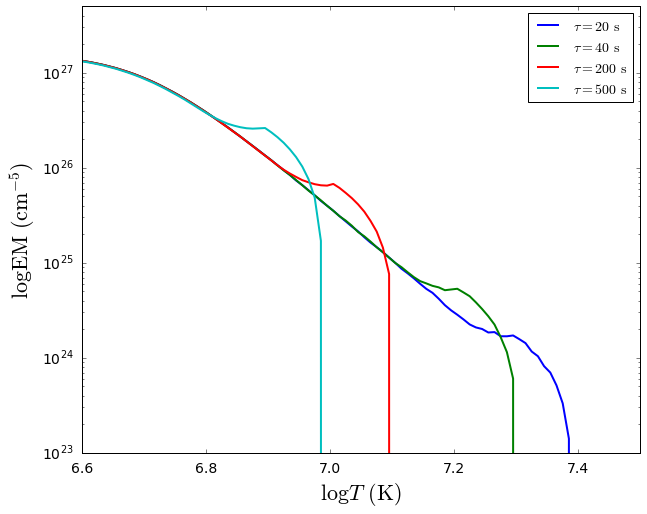

In [18]:
#set up figure
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
#plot data
for i in range(len(tau_h_results)):
    binner = emb.EM_Binner(tau_h_results[i]['t'],tau_h_results[i]['T'],tau_h_results[i]['n'],
                           2*config_dict['loop_length']*1e+8)
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette()[i],linestyle='solid',
            label=r'$\tau=%d$ $\mathrm{s}$'%tau_h[i])
#scale
ax.set_yscale('log')
#limits
ax.set_xlim([6.6,7.5])
ax.set_ylim([1e+23,0.5e+28])
#labels
ax.set_xlabel(r'$\log{T}$ $\mathrm{(K)}$')
ax.set_ylabel(r'$\log\mathrm{EM}$ $\mathrm{(cm}^{-5}\mathrm{)}$')
#ticks
#legend
ax.legend(loc='best')
plt.show()

## Figure 5

Emission measure distribution comparing electron, ion, and single cases for both long (500 s) and short (20 s) pulses.

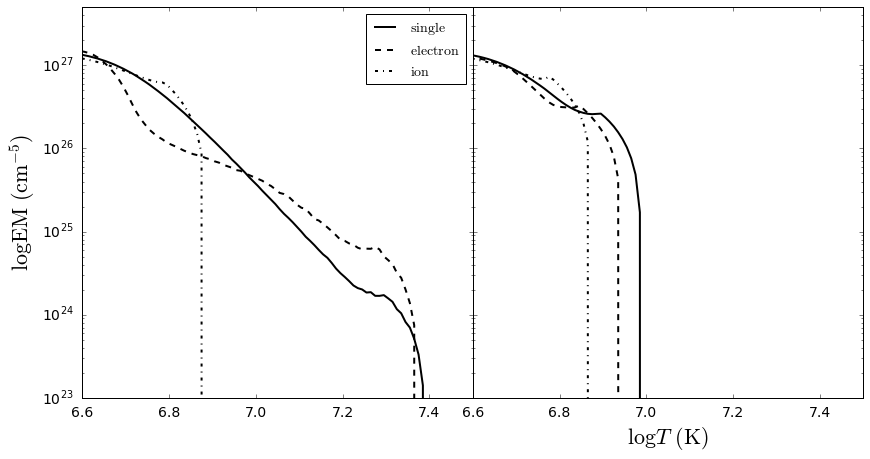

In [34]:
fig,ax = plt.subplots(1,2,figsize=(14,7),sharey=True)
plt.subplots_adjust(hspace=0.0,wspace=0.0)
#short pulse
#single
binner = emb.EM_Binner(tau_h_results[0]['t'],tau_h_results[0]['T'],tau_h_results[0]['n'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[0].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='solid',
            label=r'$\mathrm{single}$')
#electron
binner = emb.EM_Binner(tau_h_results[0]['te'],tau_h_results[0]['Tee'],tau_h_results[0]['ne'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[0].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='dashed',
            label=r'$\mathrm{electron}$')
#ion
binner = emb.EM_Binner(tau_h_results[0]['ti'],tau_h_results[0]['Tie'],tau_h_results[0]['ni'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[0].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='-.',
            label=r'$\mathrm{ion}$')
#long pulse
#single
binner = emb.EM_Binner(tau_h_results[-1]['t'],tau_h_results[-1]['T'],tau_h_results[-1]['n'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[1].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='solid')
#electron
binner = emb.EM_Binner(tau_h_results[-1]['te'],tau_h_results[-1]['Tee'],tau_h_results[-1]['ne'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[1].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='dashed')
#ion
binner = emb.EM_Binner(tau_h_results[-1]['ti'],tau_h_results[-1]['Tie'],tau_h_results[-1]['ni'],
                           2*config_dict['loop_length']*1e+8)
binner.build_em_dist()
hist,bin_edges = np.histogram(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat))
ax[1].plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color='k',linestyle='-.')
#scale
ax[0].set_yscale('log')
ax[1].set_yscale('log')
#limits
ax[0].set_xlim([6.6,7.5])
ax[0].set_ylim([1e+23,0.5e+28])
ax[1].set_xlim([6.6,7.5])
ax[1].set_ylim([1e+23,0.5e+28])
#labels
ax[1].set_xlabel(r'$\log{T}$ $\mathrm{(K)}$')
ax[0].set_ylabel(r'$\log\mathrm{EM}$ $\mathrm{(cm}^{-5}\mathrm{)}$')
#legend
ax[0].legend(loc='best')

## Figure 6

Format the data to be run by `Ion_Pop_Solver` to compute $T_{eff}$.

In [37]:
#short pulse
#single
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6a.single.ips.txt'),
           np.transpose([tau_h_results[0]['t'],tau_h_results[0]['T'],tau_h_results[0]['n']]),
           header=str(len(tau_h_results[0]['t'])),comments='',fmt='%f\t%e\t%e')
#electron
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6a.electron.ips.txt'),
           np.transpose([tau_h_results[0]['te'],tau_h_results[0]['Tee'],tau_h_results[0]['ne']]),
           header=str(len(tau_h_results[0]['te'])),comments='',fmt='%f\t%e\t%e')
#ion
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6a.ion.ips.txt'),
           np.transpose([tau_h_results[0]['ti'],tau_h_results[0]['Tie'],tau_h_results[0]['ni']]),
           header=str(len(tau_h_results[0]['ti'])),comments='',fmt='%f\t%e\t%e')
#long pulse
#single
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6b.single.ips.txt'),
           np.transpose([tau_h_results[-1]['t'],tau_h_results[-1]['T'],tau_h_results[-1]['n']]),
           header=str(len(tau_h_results[-1]['t'])),comments='',fmt='%f\t%e\t%e')
#electron
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6b.electron.ips.txt'),
           np.transpose([tau_h_results[-1]['te'],tau_h_results[-1]['Tee'],tau_h_results[-1]['ne']]),
           header=str(len(tau_h_results[-1]['te'])),comments='',fmt='%f\t%e\t%e')
#ion
np.savetxt(os.path.join(os.path.dirname(base_output+'.txt'),'fig6b.ion.ips.txt'),
           np.transpose([tau_h_results[-1]['ti'],tau_h_results[-1]['Tie'],tau_h_results[-1]['ni']]),
           header=str(len(tau_h_results[-1]['ti'])),comments='',fmt='%f\t%e\t%e')

Now run the `Ion_Pop_Solver` code! Then, plot the results.

In [41]:
#load variables
f6a_single = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6a.single.sol.ips.txt')
f6a_electron = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6a.electron.sol.ips.txt')
f6a_ion = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6a.ion.sol.ips.txt')
f6b_single = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6b.single.sol.ips.txt')
f6b_electron = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6b.electron.sol.ips.txt')
f6b_ion = np.loadtxt('/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/fig6b.ion.sol.ips.txt')

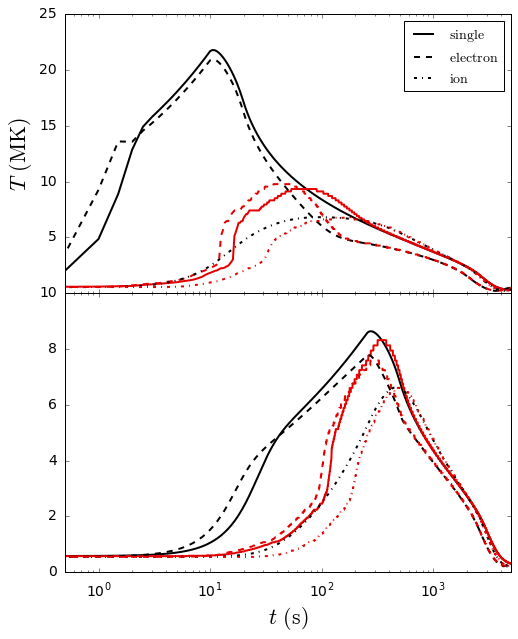

In [44]:
fig,ax = plt.subplots(2,1,figsize=(8,10),sharex=True)
plt.subplots_adjust(hspace=0.0)
#plotting
#short
ax[0].plot(f6a_single[:,0],f6a_single[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='solid',
           label=r'$\mathrm{single}$')
ax[0].plot(f6a_single[:,0],f6a_single[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='solid')
ax[0].plot(f6a_electron[:,0],f6a_electron[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='dashed',
           label=r'$\mathrm{electron}$')
ax[0].plot(f6a_electron[:,0],f6a_electron[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='dashed')
ax[0].plot(f6a_ion[:,0],f6a_ion[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='-.',
           label=r'$\mathrm{ion}$')
ax[0].plot(f6a_ion[:,0],f6a_ion[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='-.')
#long
ax[1].plot(f6b_single[:,0],f6b_single[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='solid',
           label=r'$\mathrm{single}$')
ax[1].plot(f6b_single[:,0],f6b_single[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='solid')
ax[1].plot(f6b_electron[:,0],f6b_electron[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='dashed',
           label=r'$\mathrm{electron}$')
ax[1].plot(f6b_electron[:,0],f6b_electron[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='dashed')
ax[1].plot(f6b_ion[:,0],f6b_ion[:,1]/1e+6,color=sns.xkcd_rgb['black'],linestyle='-.',
           label=r'$\mathrm{ion}$')
ax[1].plot(f6b_ion[:,0],f6b_ion[:,2]/1e+6,color=sns.xkcd_rgb['red'],linestyle='-.')
#scale
ax[0].set_xscale('log')
ax[1].set_xscale('log')
#limits
ax[0].set_xlim([0,5000])
ax[1].set_xlim([0,5000])
ax[0].set_ylim([0,25])
ax[1].set_ylim([0,10])
#tick labels
tmp_tcks = ax[0].get_yticks()
ax[0].set_yticks(ph.tick_maker(tmp_tcks,6)[1:])
tmp_tcks = ax[1].get_yticks()
ax[1].set_yticks(ph.tick_maker(tmp_tcks,6))
#axes labels
ax[1].set_xlabel(r'$t$ $\mathrm{(s)}$')
ax[0].set_ylabel(r'$T$ $\mathrm{(MK)}$')
#legend
ax[0].legend(loc='best')

## Figure 7

Emission measure distribution comparision between $T$ and $T_{eff}$ for some of the cases above.

## Figures 2, 4, & 5

We will be varying the pulse duration $\tau_H$, maximum heating rate $H_0$, and loop half-length $L$. In all cases, we will conserve the total energy density injected into the loop $q=10$ erg cm$^{-3}$ s$^{-1}$, which for triangular pulses, is written as $q=\tau_HH_0/2$.

First, instantiate the Runner class for the two-fluid model. We only need to do this once.

### Vary $H_0$

Now, we'll look at a couple of different values of the heating rate, $H_0=0.05,0.1,0.2,0.5$ erg cm$^{-3}$ s$^{-1}$. Here, I have **not** conserved the total event energy and instead kept $\tau_H=200$ s. This seems to be what has been done in the draft of Paper I and will need clarification in the final draft. 

In [63]:
h0 = [.05,.1,.2,.5]
for h in h0:
    run_and_print(config_dict,200.0,h,40.0,1,'classical',runner)

### Vary $n_0$

Now, we'll look at how different initial densities can affect the emission measure. We will look at two values, $n_0=2\times10^8,2\times10^9$ cm$^{-3}$ and then use the scaling laws to calculate the corresponding temperature.

In [ ]:
n0 = [2.e+8,2.e+9]
for in0 in n0:
    run_and_print(config_dict,200.0,0.1,40.0,1,'classical',runner,
                 n0=in0,T0=t0_scaling(40.0e+8,in0))

### Vary $L$

Here, we'll simply vary the loop half-length for three different values of $L=20,40,75$ Mm to see how this affects $\mathrm{EM}$. In the nanoflare train cases, I've found that this steepens/truncates the cool side because the cooling timescale is roughly $\tau_{cool}\propto L$ (i.e. it takes longer for longer loops to cool).

In [12]:
loop_length = [20.0,40.0,75.0]
for l in loop_length:
    run_and_print(config_dict,200.0,0.1,l,1,'classical',runner)

Plot the resulting emission measures for all values of $\tau$.

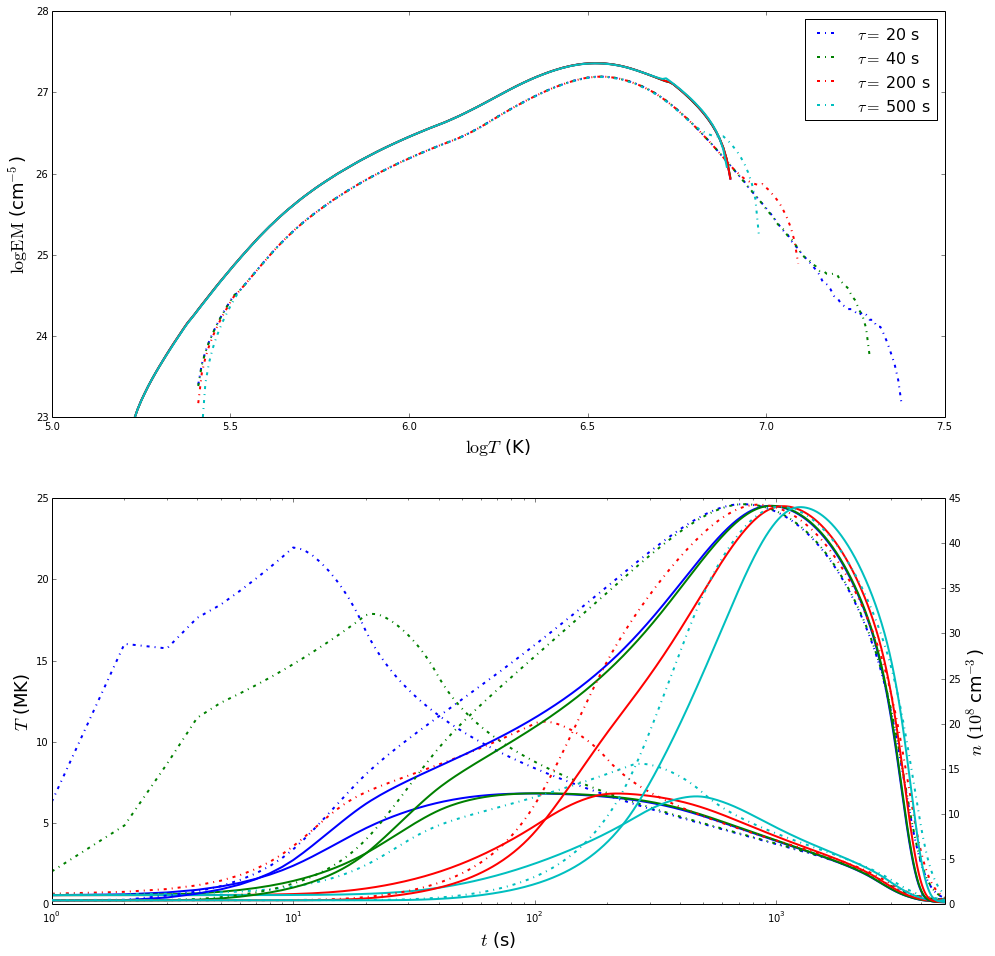

In [54]:
fig,axes = plt.subplots(2,1,figsize=(16,16))
ax_n = axes[1].twinx()
for i in range(len(results_tau_sf)):
    #EM plots
    axes[0].plot(results_tau_sf[i][0],results_tau_sf[i][1]-1,color=sns.color_palette()[i],linewidth=2,linestyle='-.',
            label=r'$\tau=$ %d s'%tau_h[i])
    #axes[0].plot(results_tau_tf[i][0],results_tau_tf[i][1],color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[0].plot(results_tau_tf_i[i][0],results_tau_tf_i[i][1]-1,color=sns.color_palette()[i],linewidth=2,
                 linestyle='-')
    #T profiles
    axes[1].plot(results_tau_sf[i][2],results_tau_sf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #axes[1].plot(results_tau_tf[i][2],results_tau_tf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[1].plot(results_tau_tf_i[i][2],results_tau_tf_i[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='-')
    #n profiles
    ax_n.plot(results_tau_sf[i][2],results_tau_sf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #ax_n.plot(results_tau_tf[i][2],results_tau_tf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    ax_n.plot(results_tau_tf_i[i][2],results_tau_tf_i[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='-')
axes[0].set_xlabel(r'$\log{T}$ (K)',fontsize=18)
axes[0].set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
axes[1].set_xlabel(r'$t$ (s)',fontsize=18)
axes[1].set_ylabel(r'$T$ (MK)',fontsize=18)
ax_n.set_ylabel(r'$n$ ($10^8 $cm$^{-3}$)',fontsize=18)
axes[1].set_xscale('log')
axes[1].set_xlim([0,config_dict['total_time']])
ax_n.set_xscale('log')
ax_n.set_xlim([0,config_dict['total_time']])
axes[0].set_xlim([5,7.5])
axes[0].set_ylim([23,28])
axes[0].legend(fontsize=16,loc='best')

## Section 2: Vary Heating Amplitude

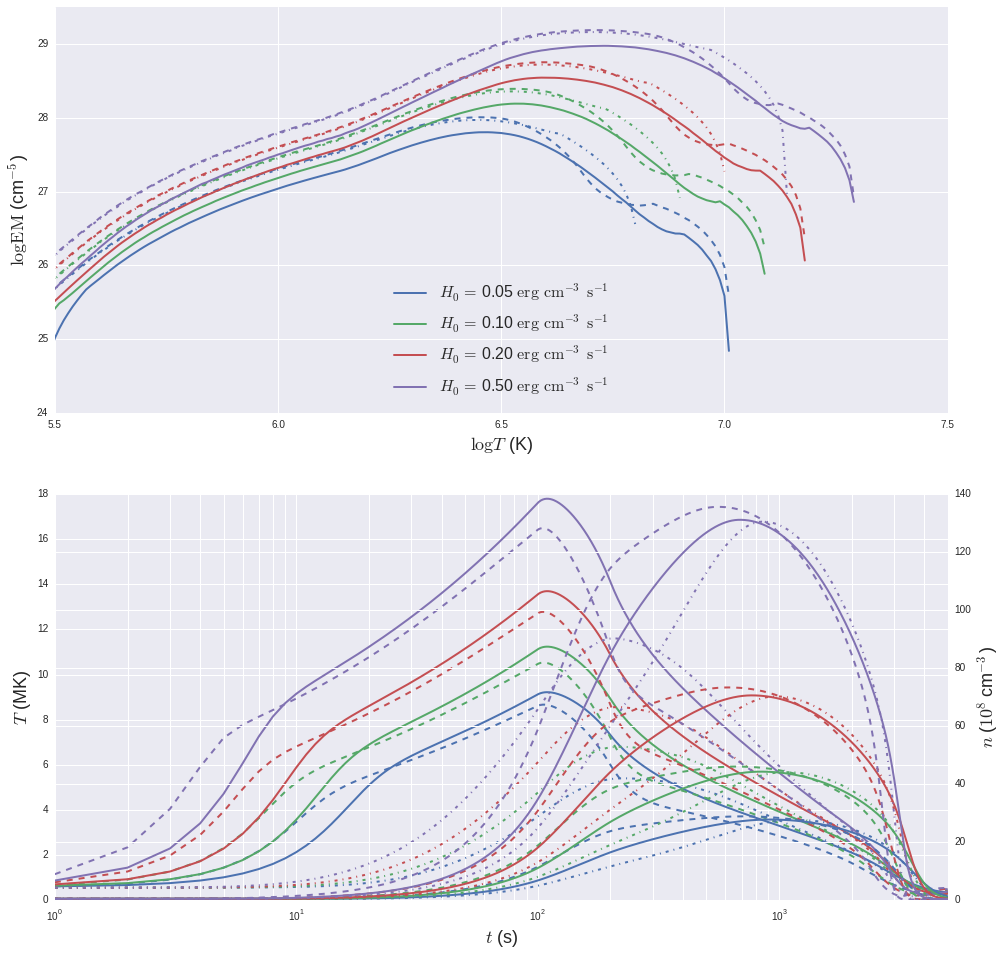

In [8]:
fig,axes = plt.subplots(2,1,figsize=(16,16))
ax_n = axes[1].twinx()
for i in range(len(results_h0_sf)):
    #EM plots
    axes[0].plot(results_h0_sf[i][0],results_h0_sf[i][1],color=sns.color_palette()[i],linewidth=2,
            label=r'$H_0=$ %.2f $\mathrm{erg}\,\mathrm{cm}^{-3}\,\mathrm{s}^{-1}$'%h0[i])
    axes[0].plot(results_h0_tf[i][0],results_h0_tf[i][1],color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[0].plot(results_h0_tf_i[i][0],results_h0_tf_i[i][1],color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #T profiles
    axes[1].plot(results_h0_sf[i][2],results_h0_sf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2)
    axes[1].plot(results_h0_tf[i][2],results_h0_tf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[1].plot(results_h0_tf_i[i][2],results_h0_tf_i[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #n profiles
    ax_n.plot(results_h0_sf[i][2],results_h0_sf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2)
    ax_n.plot(results_h0_tf[i][2],results_h0_tf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    ax_n.plot(results_h0_tf_i[i][2],results_h0_tf_i[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
axes[0].set_xlabel(r'$\log{T}$ (K)',fontsize=18)
axes[0].set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
axes[1].set_xlabel(r'$t$ (s)',fontsize=18)
axes[1].set_ylabel(r'$T$ (MK)',fontsize=18)
ax_n.set_ylabel(r'$n$ ($10^8 $cm$^{-3}$)',fontsize=18)
axes[1].set_xscale('log')
axes[1].set_xlim([0,config_dict['total_time']])
ax_n.set_xscale('log')
ax_n.set_xlim([0,config_dict['total_time']])
axes[0].set_xlim([5.5,7.5])
axes[0].set_ylim([24,29.5])
axes[0].legend(fontsize=16,loc='best')

## Section 3: Vary Loop Length

## Section 4: Change Heat Flux Limiter

Finally, in this section, we'll alter the flux limiter $\beta=1/6,1/30$ and also look at the case where the flux limiter is turned off (i.e.$\beta\to\infty$).

In [14]:
flux_lim = [[1.0/6.0,'limited'],[1.0/30.0,'limited'],[1.0,'limited'],[1.0,'classical']]
results_flux_lim_sf = []
results_flux_lim_tf = []
results_flux_lim_tf_i = []
for fl in flux_lim:
    run_and_print(config_dict,200.0,0.1,40.0,fl[0],fl[1],results_flux_lim_sf,results_flux_lim_tf,
                  results_flux_lim_tf_i,runner)

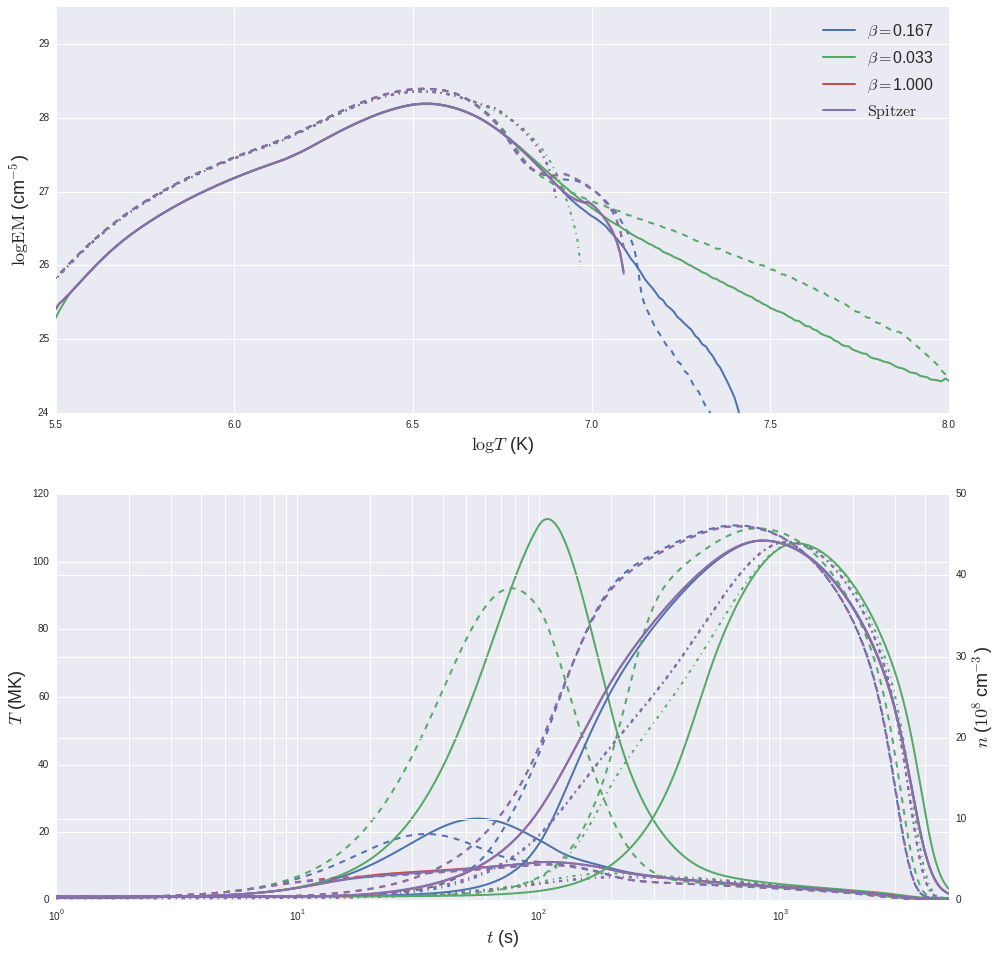

In [17]:
fig,axes = plt.subplots(2,1,figsize=(16,16))
ax_n = axes[1].twinx()
for i in range(len(results_flux_lim_sf)):
    if flux_lim[i][1] == 'classical':
        plab = r'$\mathrm{Spitzer}$'
    else:
        plab = r'$\beta=$%.3f'%flux_lim[i][0]
    #EM plots
    axes[0].plot(results_flux_lim_sf[i][0],results_flux_lim_sf[i][1],color=sns.color_palette()[i],linewidth=2,
            label=plab)
    axes[0].plot(results_flux_lim_tf[i][0],results_flux_lim_tf[i][1],color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[0].plot(results_flux_lim_tf_i[i][0],results_flux_lim_tf_i[i][1],color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #T profiles
    axes[1].plot(results_flux_lim_sf[i][2],results_flux_lim_sf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2)
    axes[1].plot(results_flux_lim_tf[i][2],results_flux_lim_tf[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    axes[1].plot(results_flux_lim_tf_i[i][2],results_flux_lim_tf_i[i][3]/1e+6,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
    #n profiles
    ax_n.plot(results_flux_lim_sf[i][2],results_flux_lim_sf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2)
    ax_n.plot(results_flux_lim_tf[i][2],results_flux_lim_tf[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='--')
    ax_n.plot(results_flux_lim_tf_i[i][2],results_flux_lim_tf_i[i][4]/1e+8,color=sns.color_palette()[i],linewidth=2,linestyle='-.')
axes[0].set_xlabel(r'$\log{T}$ (K)',fontsize=18)
axes[0].set_ylabel(r'$\log{\mathrm{EM}}$ (cm$^{-5}$)',fontsize=18)
axes[1].set_xlabel(r'$t$ (s)',fontsize=18)
axes[1].set_ylabel(r'$T$ (MK)',fontsize=18)
ax_n.set_ylabel(r'$n$ ($10^8 $cm$^{-3}$)',fontsize=18)
axes[1].set_xscale('log')
axes[1].set_xlim([0,config_dict['total_time']])
ax_n.set_xscale('log')
ax_n.set_xlim([0,config_dict['total_time']])
axes[0].set_xlim([5.5,8])
axes[0].set_ylim([24,29.5])
axes[0].legend(fontsize=16,loc='best')